## Exercise 08.1

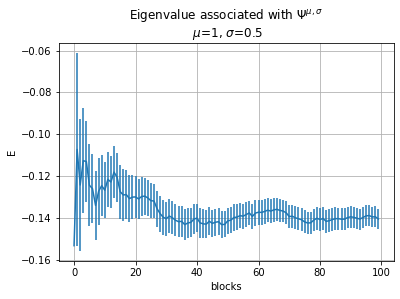

In [2]:
import numpy as np
import math
import matplotlib 
import matplotlib.pyplot as plt

N=100
x=np.arange(N)
sum_prog=np.zeros(N)
err_prog=np.zeros(N)

file=open("Results/ExpectedEigenvalue.txt")
line=file.readlines()
for i in range(N):
    data=line[i].split()
    sum_prog[i]=data[0] 
    err_prog[i]=data[1]
    
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.xlabel("blocks")
plt.ylabel("E")
plt.grid(True)
plt.title("Eigenvalue associated with $\Psi^{\mu,\sigma}$ \n $\mu$=1, $\sigma$=0.5")
plt.show()

## Exercise 08.2

### Ground State 

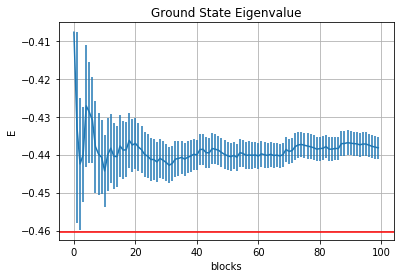

In [3]:
N=100
x=np.arange(N)
sum_prog=np.zeros(N)
err_prog=np.zeros(N)

file=open("Results/GroundState.txt")
line=file.readlines()
for i in range(N):
    data=line[i].split()
    sum_prog[i]=data[0] 
    err_prog[i]=data[1]
    
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.xlabel("blocks")
plt.ylabel("E")
plt.grid(True)
plt.title("Ground State Eigenvalue")
plt.axhline(-0.46046587969271535,color='r')
plt.show()

### Ground state pdf, $|\Psi_T (x)|^2$

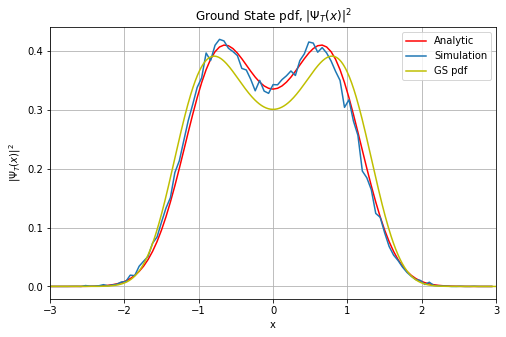

In [4]:
from scipy.integrate import simps
import math

def Vpot(x):
    return (x**2 - 2.5)*x**2

def ground_state(x,mu,sigma):
    return math.exp(-(x-mu)**2/(2*sigma**2))+math.exp(-(x+mu)**2/(2*sigma**2))

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
p = np.linspace(-a/2, a/2, N)
dp = p[1] - p[0] # the step size
V = Vpot(p)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dp**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dp)

#Parameters taken from the bash output for the analytic pdf
mu=0.766873
sigma=0.634585

nbins=100
x=np.zeros(nbins)
pdf=np.zeros(nbins)

file=open("Results/GroundState_pdf.txt")
line=file.readlines()
for i in range(nbins):
    data=line[i].split()
    x[i]=data[0] 
    pdf[i]=data[1]

I = simps(pdf,x)   #Normalization coefficient of the simulation: integral of pdf(x)dx in the range [-3,3)
for i in range(nbins):
    pdf[i]/=I

anal=np.array([ground_state(el,mu,sigma)**2 for el in x])

I2=simps(anal,x)   #Normalization coefficient of the analytic function
for i in range(nbins):
    anal[i]/=I2
    
plt.figure(figsize=(8,5))
plt.plot(x,anal,color='r', label="Analytic")
plt.plot(x,pdf, label="Simulation")
plt.plot(p,(psi[0])**2, color='y', label='GS pdf')
plt.xlabel("x")
plt.ylabel("$|\Psi_T (x)|^2$")
plt.grid(True)
plt.title("Ground State pdf, $|\Psi_T (x)|^2$")
plt.xlim((-3,3))
plt.legend()
plt.show()

We see that the simulated function is in perfect agreement with the analytic pdf obtained by the ground state function, as we expected. Besides, by comparing our simulation with the plot obtained by transforming the Schrodinger equation into a matrix equation, we see that they nearly match because of the uncertainty on points of the simulated pdf. Again, we expected this outcome after looking at the plot of the ground state eigenvalue in the graph above.